<h2>1. Data Loading and Preparation</h2>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("D:\Prathamesh\Data Analytics\Project\earthquake_data_tsunami.csv")

In [3]:
# Basic info
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Sample Data:\n", df.head())

Dataset Shape: (782, 13)
Columns: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'tsunami']
Data Types:
 magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object
Missing Values:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64
Sample Data:
    magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178

<h2>2. Time Based Analysis</h2>

In [4]:
# Group by year for counts and averages
yearly_counts = df.groupby('Year').size()
yearly_tsunami = df[df['tsunami'] == 1].groupby('Year').size()
yearly_magnitude = df.groupby('Year')['magnitude'].mean()

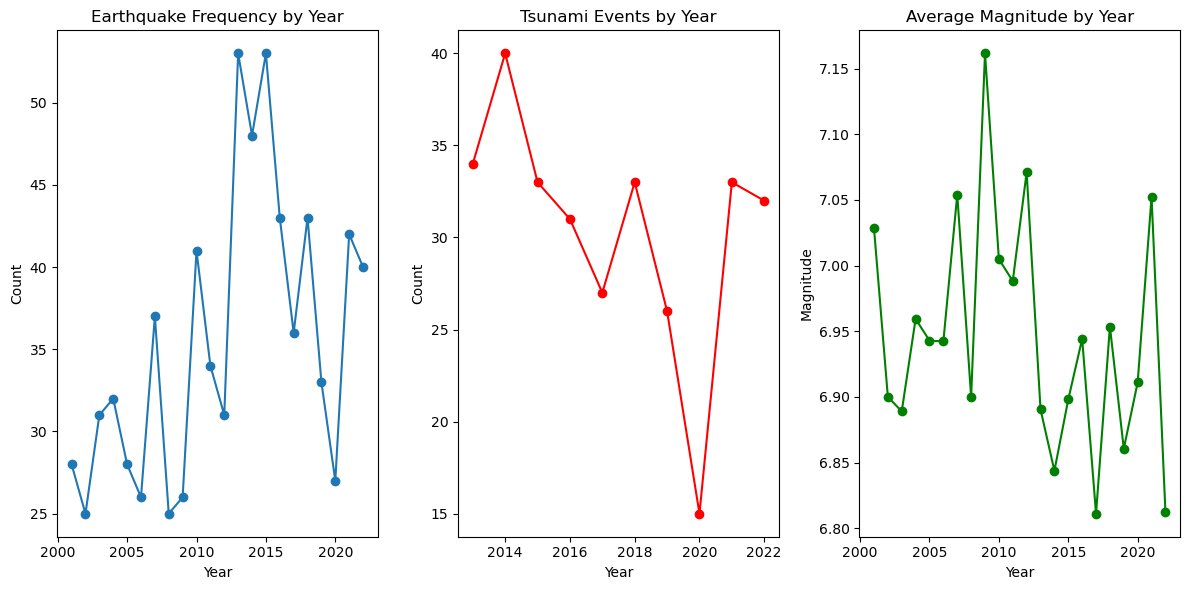

In [5]:
# Plot time-series
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
yearly_counts.plot(kind='line', marker='o')
plt.title('Earthquake Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
yearly_tsunami.plot(kind='line', marker='o', color='red')
plt.title('Tsunami Events by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
yearly_magnitude.plot(kind='line', marker='o', color='green')
plt.title('Average Magnitude by Year')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

<h2>3. Magnitude and Depth Analysis</h2>

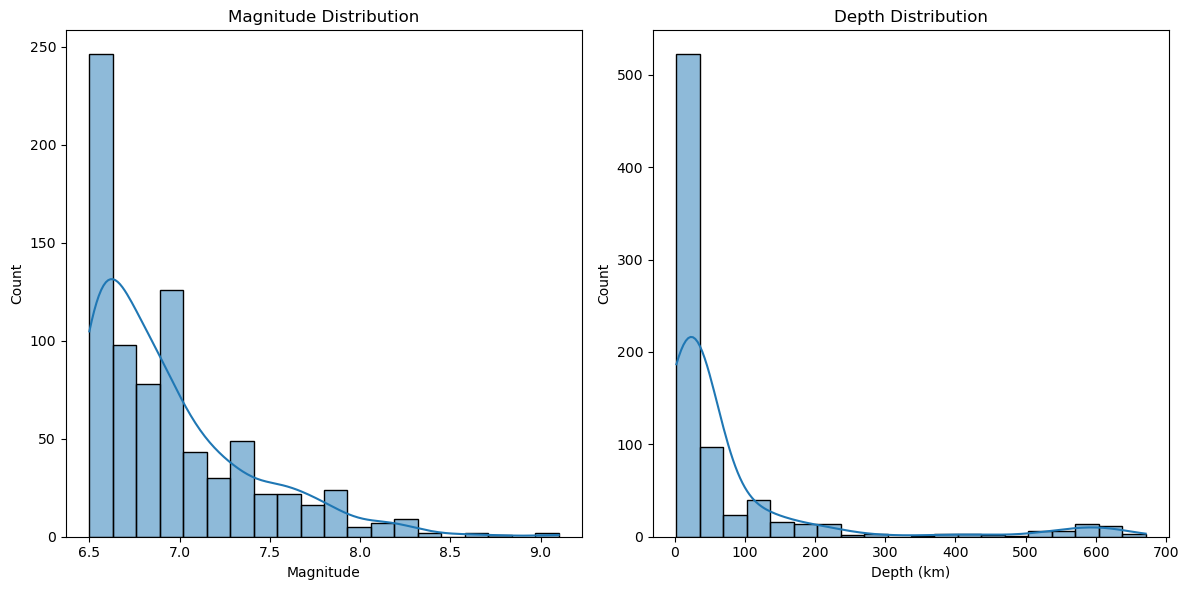

In [6]:
# Distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['magnitude'], bins=20, kde=True)
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')

plt.subplot(1, 2, 2)
sns.histplot(df['depth'], bins=20, kde=True)
plt.title('Depth Distribution')
plt.xlabel('Depth (km)')
plt.tight_layout()
plt.show()

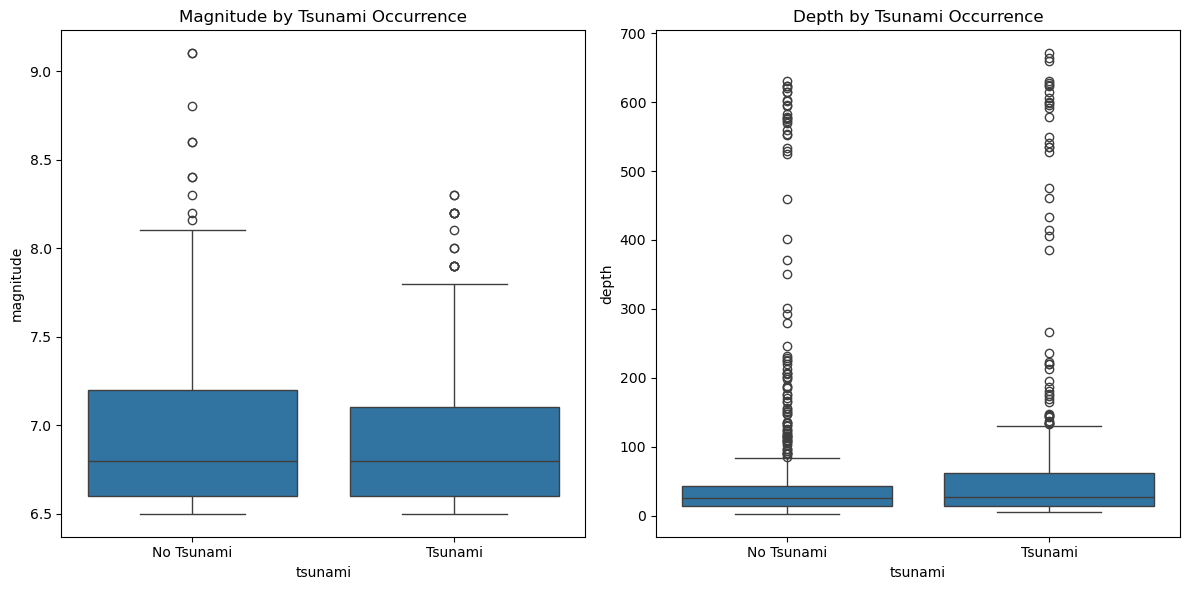

In [7]:
# Compare tsunami vs. non-tsunami
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='tsunami', y='magnitude', data=df)
plt.title('Magnitude by Tsunami Occurrence')
plt.xticks([0, 1], ['No Tsunami', 'Tsunami'])

plt.subplot(1, 2, 2)
sns.boxplot(x='tsunami', y='depth', data=df)
plt.title('Depth by Tsunami Occurrence')
plt.xticks([0, 1], ['No Tsunami', 'Tsunami'])
plt.tight_layout()
plt.show()

In [8]:
# Major earthquakes (>=8.0)
major = df[df['magnitude'] >= 8.0]
print("Major Earthquakes (>=8.0):\n", major[['Year', 'magnitude', 'depth', 'tsunami']].head())
print("Count:", len(major))

Major Earthquakes (>=8.0):
      Year  magnitude   depth  tsunami
56   2021        8.1   22.79        0
59   2021        8.2   46.66        1
60   2021        8.2   35.00        1
74   2021        8.1   28.93        1
129  2019        8.0  122.57        1
Count: 28


<h2>4. Geographic Distribution Using 2D Plotting</h2>

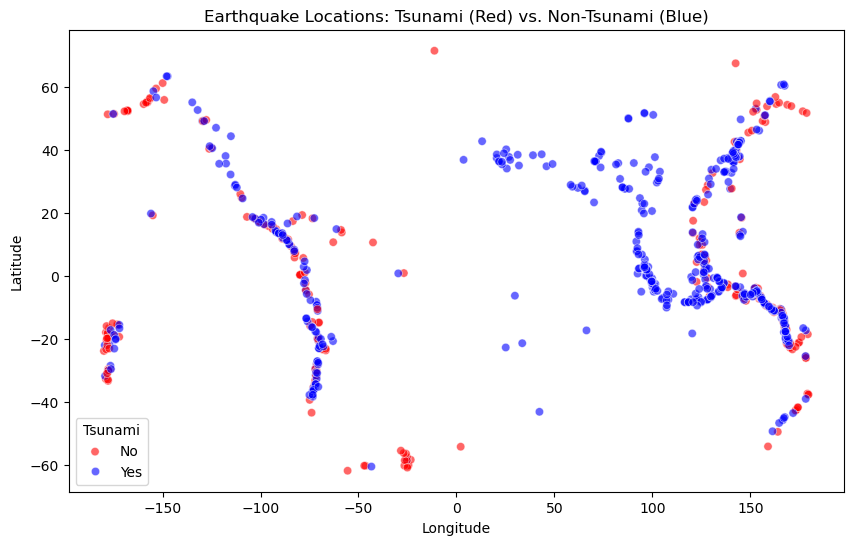

In [9]:
# 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='tsunami', data=df, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Earthquake Locations: Tsunami (Red) vs. Non-Tsunami (Blue)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tsunami', labels=['No', 'Yes'])
plt.show()

<h2>5. Statistical and Comparative Analysis</h2>

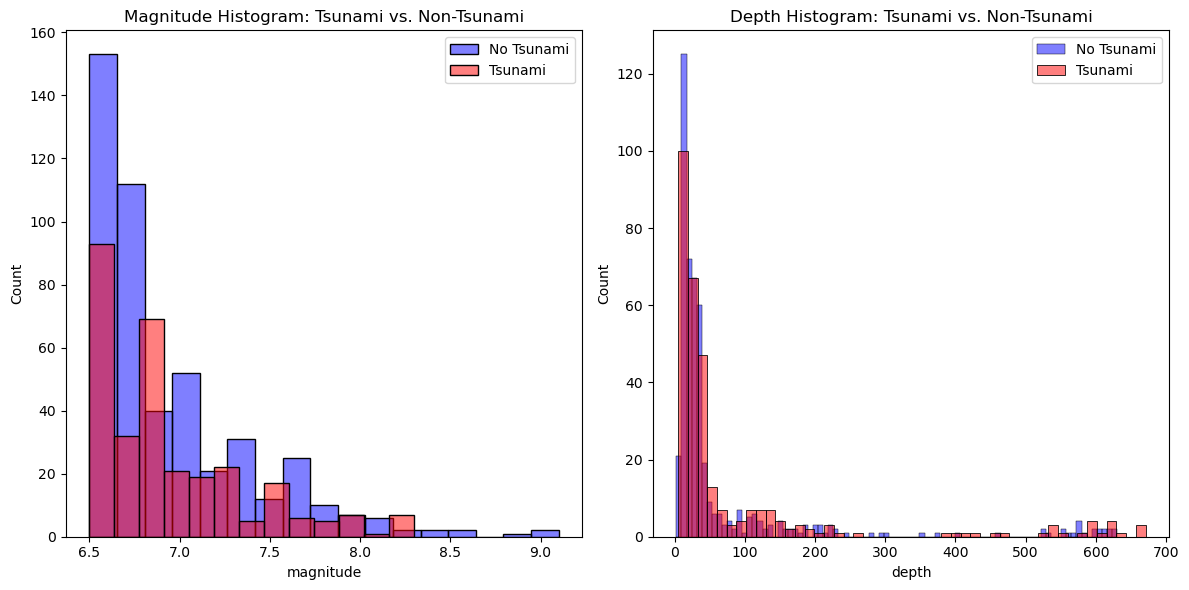

In [10]:
# Histograms for tsunami vs. non-tsunami
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['tsunami']==0]['magnitude'], color='blue', label='No Tsunami', alpha=0.5)
sns.histplot(df[df['tsunami']==1]['magnitude'], color='red', label='Tsunami', alpha=0.5)
plt.title('Magnitude Histogram: Tsunami vs. Non-Tsunami')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df[df['tsunami']==0]['depth'], color='blue', label='No Tsunami', alpha=0.5)
sns.histplot(df[df['tsunami']==1]['depth'], color='red', label='Tsunami', alpha=0.5)
plt.title('Depth Histogram: Tsunami vs. Non-Tsunami')
plt.legend()
plt.tight_layout()
plt.show()

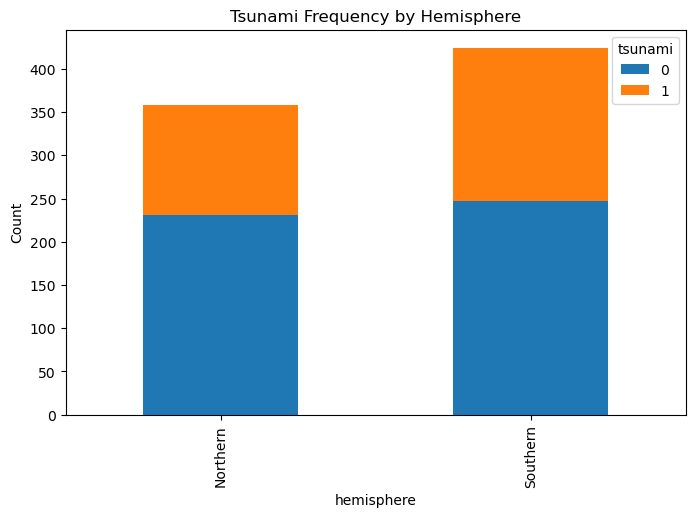

In [11]:
# Bar chart for tsunami frequency by region (simplified by hemisphere)
df['hemisphere'] = np.where(df['latitude'] > 0, 'Northern', 'Southern')
region_tsunami = df.groupby(['hemisphere', 'tsunami']).size().unstack()
region_tsunami.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Tsunami Frequency by Hemisphere')
plt.ylabel('Count')
plt.show()

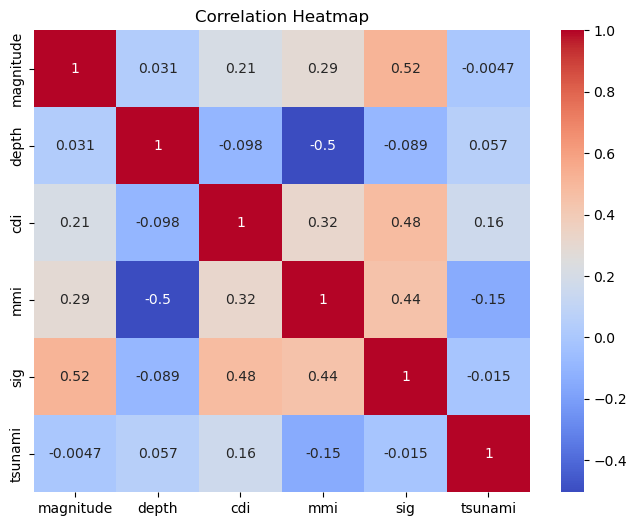

In [12]:
# Correlation heatmap
corr = df[['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'tsunami']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()